# **Projet :** *k plus proches voisins*

**Résumé:** Il s'agit d'un modèle prédictif de l'attribut d'un individu (son sexe) à partir des caractéristiques (taille et poids) de ce dernier et d'un **jeu d'entrainement** (ensemble d’individus pour lesquels on a accès à la fois à des attributs descriptifs et à la valeur de la caractéristique à prédire).

Pour se faire, nous avons:

1.   Evaluer les distances entre le nouvel individu et tous les individus du jeu d'entrainement.
2.   Conserver les k individus du jeu d'entrainement qui sont plus proches du nouvel individu.
3.   Evaluer le sexe le plus représentatif (qui est plus présent) parmi les k individus.
4.   Attribuer ce sexe au nouvel individu.



Sur l'image ci-dessous, les croix en noire représente le sexe à prédire par notre modèle:

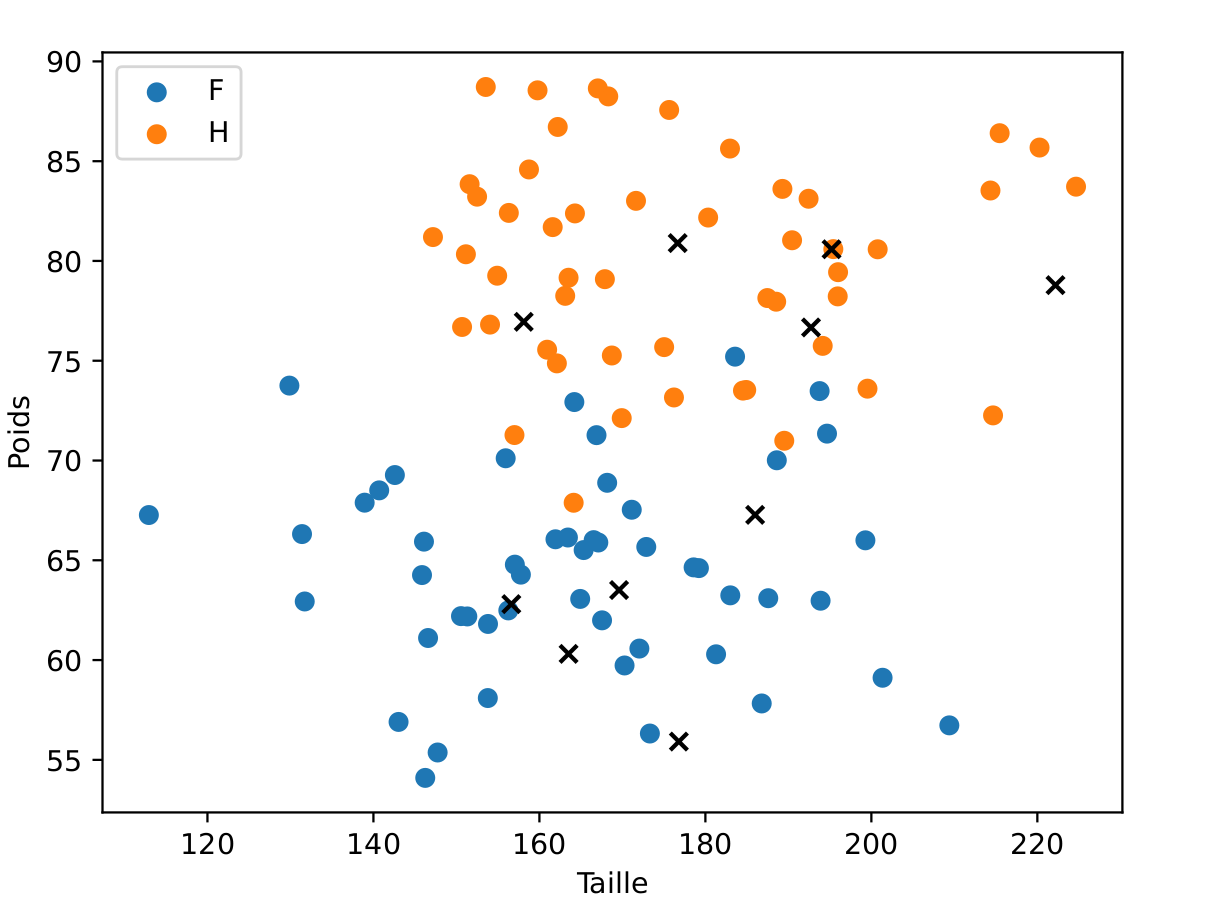

Passons à la codification de tout ceci:

## **Partie 0**: Récupération et visualisation des données

In [ ]:
# Section 1: Import de module
import P01_utils as p
import numpy as np

In [ ]:
# Récupération des caractéristiques (X) et ses attributs(Y) de 100 individus
X,Y = p.lire_donnees(100)

# Visualisation avec 10 individus tests
p.visualiser_donnees(X,Y,X_test=p.lire_donnees(10)[0])

## **Partie 1**: Création de nos propres fonctions à l'exception de argsort() pris dans numpy

In [ ]:
def dist(X_i,X_j):
    d = 0
    n = len(X_j)
    for i in range(n):
        d = d + ((X_i[i] - X_j[i])**2 )         # dist(X,Y) = ||X-Y||
    resultat = d**0.5
    return resultat                             #resultat = math.sum((X_i - X_j)**2)**0.5 : même résultat en un ligne

In [ ]:
def indices_k_proche(k,x_y, X = p.lire_donnees(100)[0]):   # x_y est un vecteur coordonnées
    liste = []
    for i in range(100):
        liste.append(dist(x_y,X[i]))  # Calcul de la distance de x_y à tous les points du jeu d'entrainement que l'on envoie dans une liste
    indice_liste = np.argsort(liste)                  #argsort renvoie les indices des éléments du plus petit au plus grand
    #k_indices_liste = list()                                #Meilleur façon de définir une liste vide
    k_indices_liste = list(indice_liste[0:k])           # récupère les k premiers indices de la précédente liste
    return k_indices_liste

In [ ]:
def classe_plus_representee(chaine_classe):
    classe_F_represente = chaine_classe.count("F")      #Compte le nombre d'occurrence de "F" dans la chaine
    classe_H_represente = chaine_classe.count("H")
    if classe_F_represente > classe_H_represente:
        return "F"
    elif classe_F_represente < classe_H_represente:
        return "H"

In [ ]:
def  k_plus_proches_voisins_liste(donnees_train, donnees_test, k=1):
    points_jeu_train = donnees_train[0]                             #On prends la peine de séparer les éléments qui seront utilisé pour plus de lisibilité
    classes_jeu_train = donnees_train[1]
    liste_de_prediction = list()                                     # On défini tous les éléments qui seront utilisés
    liste_k_indice = list()
    classe_k_proches =list()
    for i in donnees_test:                                            # il est question de prédire le sexe pour tous les éléments ou individus du jeu test
        liste_k_indice = indices_k_proche(k,i,points_jeu_train)       # Récupération des indices des k plus proches
        for j in liste_k_indice:
            classe_k_proches.append(classes_jeu_train[j])             # Transformation en liste des genre des k plus proches individus
        genre_x = classe_plus_representee(classe_k_proches)           # prédiction du sexe d'un individu du jeu test
        liste_de_prediction.append(genre_x)                           # liste contenant toutes les prédictions du jeu test
    return liste_de_prediction

**Partie 2:** Testons notre modèle de prédiction

In [ ]:
print(k_plus_proches_voisins_liste(p.lire_donnees(100),p.lire_donnees(10)[0],10))